In [32]:
import kagglehub
import numpy as np 
import os
import torchaudio
import matplotlib.pyplot as plt
from pathlib import Path
from random import choice
from IPython.display import Audio, display


In [ ]:

# Download latest version
path = kagglehub.dataset_download("chrisfilo/urbansound8k")


print("Path to dataset files:", path)


/Users/max/.cache/kagglehub/datasets/chrisfilo/urbansound8k/versions/1/fold10/51024-3-0-3.wav


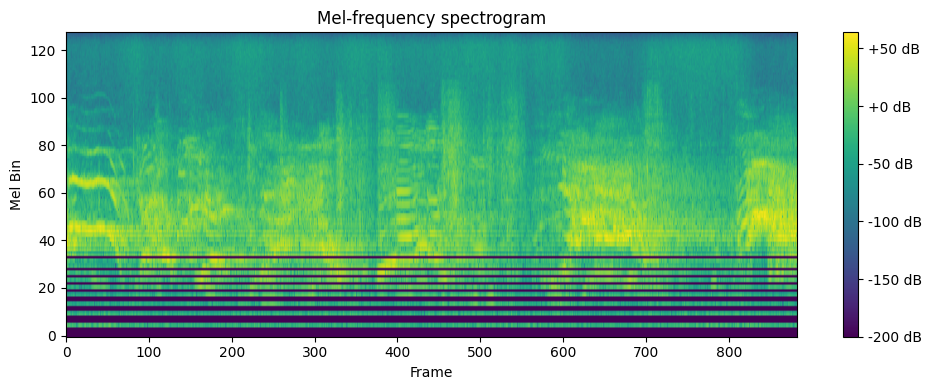

In [61]:

wp = list(Path(path).glob('**/*.wav'))
sound_file = choice(wp)
display(Audio(str(sound_file), autoplay=True))

# Load the audio file using torchaudio
waveform, sr = torchaudio.load(sound_file)

# Plot the spectrogram
plt.figure(figsize=(10, 4))
spec = torchaudio.transforms.MelSpectrogram(sample_rate=sr, n_mels=128)(waveform)
spec_db_lr = torchaudio.transforms.AmplitudeToDB()(spec)
spec_db = np.sum(spec_db_lr.numpy(), axis=0)
plt.imshow(spec_db, aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.xlabel('Frame')
plt.ylabel('Mel Bin')
plt.tight_layout()
plt.show()

In [ ]:
# Compute a standard spectrogram (not Mel) and plot with frequency on y-axis
spectrogram = torchaudio.transforms.Spectrogram(n_fft=2048, hop_length=512, power=2)(waveform)
spec_db_freq = torchaudio.transforms.AmplitudeToDB()(spectrogram)

plt.figure(figsize=(10, 4))
freqs = np.linspace(0, sr // 2, spectrogram.shape[1])
plt.imshow(spec_db_freq.squeeze().numpy(), aspect='auto', origin='lower',
           extent=[0, spectrogram.shape[-1], 0, sr // 2])
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (Frequency)')
plt.xlabel('Frame')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

In [ ]:
# Export spectrograms as image files
import matplotlib.pyplot as plt
from pathlib import Path

# Create output directory for spectrogram images
output_dir = Path("spectrogram_images")
output_dir.mkdir(exist_ok=True)

# Get the base filename without extension
base_filename = str(sound_file.stem)

# Export Mel Spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(spec_db, aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.xlabel('Frame')
plt.ylabel('Mel Bin')
plt.tight_layout()
mel_output_path = output_dir / f"{base_filename}_mel.png"
plt.savefig(mel_output_path, dpi=150, bbox_inches='tight')
plt.close()

# Export Regular Spectrogram (frequency domain)
# First compute the spectrogram if not already done
spectrogram = torchaudio.transforms.Spectrogram(n_fft=2048, hop_length=512, power=2)(waveform)
spec_db_freq = torchaudio.transforms.AmplitudeToDB()(spectrogram)

plt.figure(figsize=(10, 4))
plt.imshow(spec_db_freq.squeeze().numpy(), aspect='auto', origin='lower',
           extent=[0, spectrogram.shape[-1], 0, sr // 2])
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (Frequency)')
plt.xlabel('Frame')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
freq_output_path = output_dir / f"{base_filename}_freq.png"
plt.savefig(freq_output_path, dpi=150, bbox_inches='tight')
plt.close()

print(f"Exported spectrograms:")
print(f"  Mel spectrogram: {mel_output_path}")
print(f"  Frequency spectrogram: {freq_output_path}")